# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Gilang Kurnia Mandari]
- **Email:** [m308d4ky2521@bangkit.academy]
- **ID Dicoding:** [gilangkurnia0803]

## Menentukan Pertanyaan Bisnis

Specific
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda secara harian dan per jam di sistem Bike Sharing, serta apakah terdapat perbedaan pengaruh antara kedua periode tahun yang tersedia (2011 dan 2012)?

Measurable
- Bagaimana korelasi antara kondisi cuaca (weathersit) dengan jumlah penyewaan sepeda secara harian dan per jam di sistem Bike Sharing, serta apakah terdapat perbedaan korelasi antara kedua periode tahun yang tersedia (2011 dan 2012)?

Action Oriented
- Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari kerja dan libur di sistem Bike Sharing selama dua tahun pengamatan (2011 dan 2012)?

Relevant
- Bagaimana performa penggunaan layanan penyewaan sepeda selama musim panas dan musim dingin di dua tahun terakhir, dan bagaimana implikasi hasil analisis ini terhadap pengelolaan stok sepeda dan strategi pemasaran?

Time-Bound
- Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 hingga 2012, dan apakah terdapat tren peningkatan atau penurunan yang signifikan selama periode tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import os
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('./data/day.csv')
hour = pd.read_csv('./data/hour.csv')

import pandas as pd

# Misalnya, hourly_data adalah DataFrame yang berisi data penyewaan sepeda per jam
hourly_data = pd.read_csv("./data/hour.csv")

# Misalnya, daily_data adalah DataFrame yang berisi data penyewaan sepeda per hari
daily_data = pd.read_csv("./data/day.csv")


In [3]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
pd.unique(day['season'])

array([1, 2, 3, 4], dtype=int64)

In [7]:
season_analysis = day.iloc[:,[2,13,14.15]]
season_analysis

,season,casual,registered
0,1,331,654
1,1,131,670
2,1,120,1229
3,1,108,1454
4,1,82,1518
...,...,...,...
726,1,247,1867
727,1,644,2451
728,1,159,1182
729,1,364,1432


In [8]:
sea=['springer', 'summer', 'fall', 'winter']

In [9]:
season_analysis['season']=season_analysis['season'].replace([1, 2, 3, 4], sea)

C:\Users\kurni\AppData\Local\Temp\ipykernel_21048\2731585854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_analysis['season']=season_analysis['season'].replace([1, 2, 3, 4], sea)


In [10]:
season_analysis

,season,casual,registered
0,springer,331,654
1,springer,131,670
2,springer,120,1229
3,springer,108,1454
4,springer,82,1518
...,...,...,...
726,springer,247,1867
727,springer,644,2451
728,springer,159,1182
729,springer,364,1432


In [11]:
season_analysis_result = season_analysis.groupby('season').sum()

<Axes: xlabel='season'>

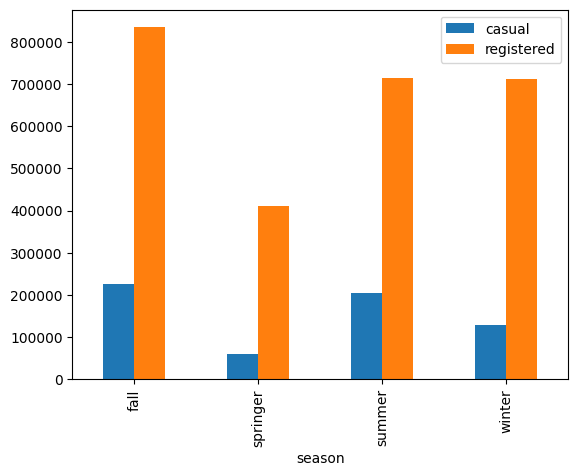

In [12]:
season_analysis_result.plot.bar()

In [13]:
holiday_analysis = day.iloc[:,[5,13,14.15]]

In [14]:
pd.unique(holiday_analysis['holiday'])

array([0, 1], dtype=int64)

In [15]:
holiday_analysis_result = holiday_analysis.groupby('holiday').sum()
holiday_analysis_result

,casual,registered
holiday,,
0,597658,2616586
1,22359,56076


<Axes: xlabel='holiday'>

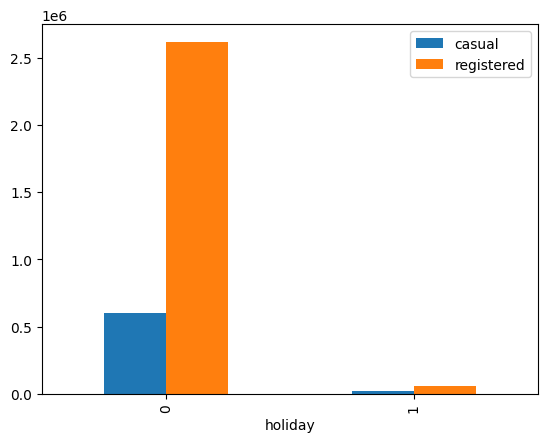

In [16]:
holiday_analysis_result.plot.bar()

In [17]:
temp_analysis = day.iloc[:,[10,13,14,15]]
temp_analysis

,atemp,casual,registered,cnt
0,0.363625,331,654,985
1,0.353739,131,670,801
2,0.189405,120,1229,1349
3,0.212122,108,1454,1562
4,0.229270,82,1518,1600
...,...,...,...,...
726,0.226642,247,1867,2114
727,0.255046,644,2451,3095
728,0.242400,159,1182,1341
729,0.231700,364,1432,1796


In [18]:
temp_analysis['atemp'].describe()

count    731.000000
mean       0.474354
std        0.162961
min        0.079070
25%        0.337842
50%        0.486733
75%        0.608602
max        0.840896
Name: atemp, dtype: float64

<Figure size 1000x1500 with 0 Axes>

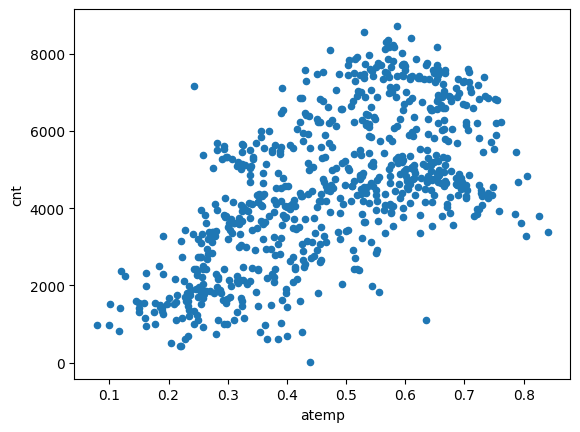

In [19]:
plt.figure(figsize=(10,15))
temp_analysis.plot.scatter(x='atemp', y='cnt')
plt.show()

In [20]:
41*55,41*65

(2255, 2665)

### Assessing Data

In [21]:
print('Dataframe day:')
print(day.info())

print('\nDataframe hour:')
print(hour.info())

Dataframe day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Dataframe hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 

### Cleaning Data

In [22]:
# day
day["dteday"] = pd.to_datetime(day["dteday"])
# hour
hour["dteday"] = pd.to_datetime(hour["dteday"])
# Check data type for day and hour
print('day["dteday"] : ', day["dteday"].dtypes)
print('hour["dteday"] : ', hour["dteday"].dtypes)

day["dteday"] :  datetime64[ns]
hour["dteday"] :  datetime64[ns]


## Exploratory Data Analysis (EDA)

### Korelasi

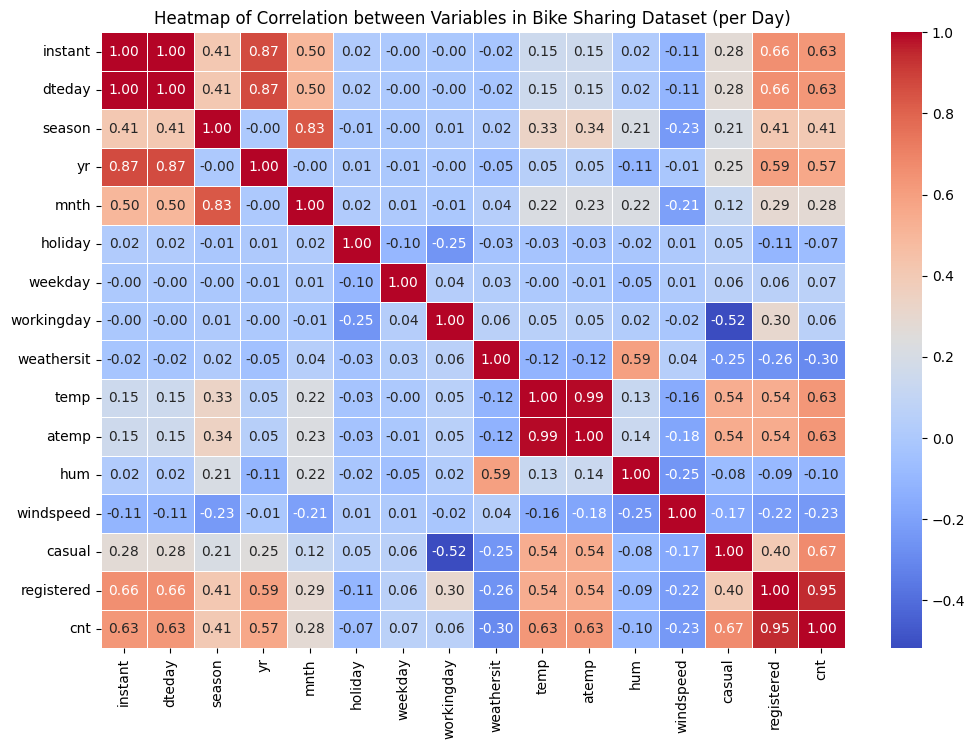

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming day_data is your DataFrame containing the bike sharing data
correlation_matrix = day.corr()

# Plot heatmap of correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation between Variables in Bike Sharing Dataset (per Day)')
plt.show()

### Analisis Distribusi

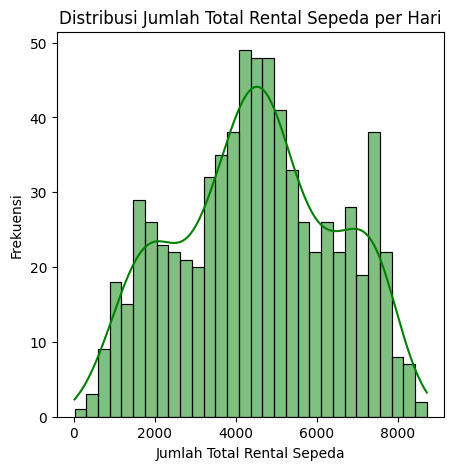

Deskripsi Statistik untuk Variabel 'cnt':
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


In [24]:
cnt_stats = day['cnt'].describe()

plt.figure(figsize=(5, 5))
sns.histplot(day['cnt'], bins=30, kde=True, color='green')
plt.title('Distribusi Jumlah Total Rental Sepeda per Hari')
plt.xlabel('Jumlah Total Rental Sepeda')
plt.ylabel('Frekuensi')
plt.show()

print("Deskripsi Statistik untuk Variabel 'cnt':")
print(cnt_stats)

### Distribusi variabel kategorikal

C:\Users\kurni\AppData\Local\Temp\ipykernel_21048\3636193068.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=day, palette='pastel')


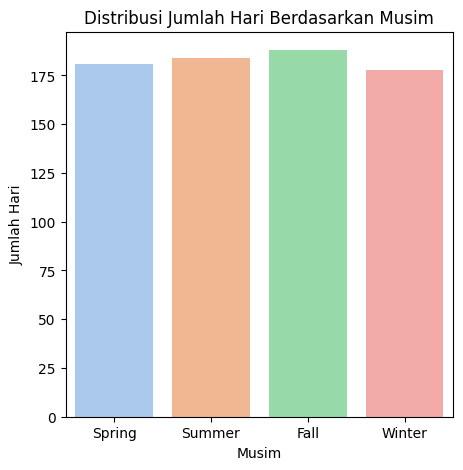

Tabel Frekuensi untuk Variabel 'season':
season
3    188
2    184
1    181
4    178
Name: count, dtype: int64


In [25]:
season_counts = day['season'].value_counts()

plt.figure(figsize=(5, 5))
sns.countplot(x='season', data=day, palette='pastel')
plt.title('Distribusi Jumlah Hari Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

print("Tabel Frekuensi untuk Variabel 'season':")
print(season_counts)

### Hubungan antara musim dan jumlah sewa

In [26]:
fig = px.box(day, x='season', y='cnt', title='Hubungan antara Musim dan Jumlah Sewa')
fig.update_xaxes(title_text='Musim')
fig.update_yaxes(title_text='Jumlah Sewa')
fig.show()

### Hubungan antara hari libur dan jumlah sewa

In [27]:
fig = px.box(day, x='holiday', y='cnt', title='Hubungan antara Hari Libur dan Jumlah Sewa')
fig.update_xaxes(title_text='Hari Libur')
fig.update_yaxes(title_text='Jumlah Sewa')
fig.show()

### Hubungan antara cuaca dan jumlah sewa

In [28]:
fig = px.box(day, x='weathersit', y='cnt', title='Hubungan antara Cuaca dan Jumlah Sewa')
fig.update_xaxes(title_text='Cuaca')
fig.update_yaxes(title_text='Jumlah Sewa')
fig.show()

### Scatter plot antara suhu dan jumlah sewa

In [29]:
fig = px.scatter(day, x='temp', y='cnt', title='Scatter Plot antara Suhu dan Jumlah Sewa')
fig.update_xaxes(title_text='Suhu (Celsius)')
fig.update_yaxes(title_text='Jumlah Sewa')
fig.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda secara harian dan per jam di sistem Bike Sharing, serta apakah terdapat perbedaan pengaruh antara kedua periode tahun yang tersedia (2011 dan 2012)?

In [30]:
# Aggregate data harian dan per jam berdasarkan kondisi cuaca dan tahun
hourly_weather_counts = hourly_data.groupby(['weathersit', 'yr']).sum()['cnt']
daily_weather_counts = daily_data.groupby(['weathersit', 'yr']).sum()['cnt']

# Cetak hasil
print("Jumlah penyewaan sepeda per jam berdasarkan kondisi cuaca dan tahun:")
print(hourly_weather_counts)
print("\nJumlah penyewaan sepeda per hari berdasarkan kondisi cuaca dan tahun:")
print(daily_weather_counts)


Jumlah penyewaan sepeda per jam berdasarkan kondisi cuaca dan tahun:
weathersit  yr
1           0      875053
            1     1463120
2           0      300519
            1      495433
3           0       67495
            1       90836
4           0          36
            1         187
Name: cnt, dtype: int64

Jumlah penyewaan sepeda per hari berdasarkan kondisi cuaca dan tahun:
weathersit  yr
1           0      835067
            1     1422885
2           0      382924
            1      613934
3           0       25112
            1       12757
Name: cnt, dtype: int64


### Pertanyaan 2: Bagaimana korelasi antara kondisi cuaca (weathersit) dengan jumlah penyewaan sepeda secara harian dan per jam di sistem Bike Sharing, serta apakah terdapat perbedaan korelasi antara kedua periode tahun yang tersedia (2011 dan 2012)?

In [31]:
# Agregasi data harian dan per jam berdasarkan kondisi cuaca
hourly_weather_counts = hourly_data.groupby('weathersit')['cnt'].sum()
daily_weather_counts = daily_data.groupby('weathersit')['cnt'].sum()

# Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per jam untuk tahun 2011
print("Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per jam (Tahun 2011):")
print(hourly_data[hourly_data['yr'] == 0][['weathersit', 'cnt']].corr().iloc[0, 1])

# Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari untuk tahun 2011
print("\nKorelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari (Tahun 2011):")
print(daily_data[daily_data['yr'] == 0][['weathersit', 'cnt']].corr().iloc[0, 1])

# Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per jam untuk tahun 2012
print("\nKorelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per jam (Tahun 2012):")
print(hourly_data[hourly_data['yr'] == 1][['weathersit', 'cnt']].corr().iloc[0, 1])

# Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari untuk tahun 2012
print("\nKorelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari (Tahun 2012):")
print(daily_data[daily_data['yr'] == 1][['weathersit', 'cnt']].corr().iloc[0, 1])

Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per jam (Tahun 2011):
-0.14328826081789808

Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari (Tahun 2011):
-0.31827447038472967

Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per jam (Tahun 2012):
-0.14834639247197232

Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda per hari (Tahun 2012):
-0.34591268349732246


### Pertanyaan 3 : Bagaimana distribusi jumlah penyewaan sepeda berdasarkan hari kerja dan libur di sistem Bike Sharing selama dua tahun pengamatan (2011 dan 2012)?

<Figure size 500x500 with 0 Axes>

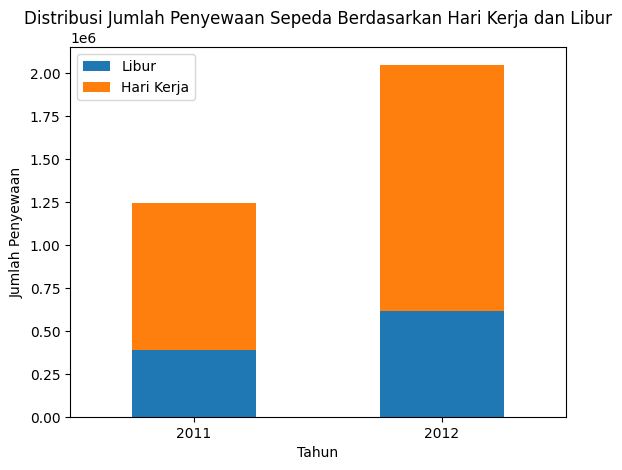

In [32]:
# Agregasi data harian berdasarkan tahun dan hari kerja
daily_counts_by_workingday = daily_data.groupby(['yr', 'workingday']).sum()['cnt']

# Visualisasi distribusi jumlah penyewaan
plt.figure(figsize=(5, 5))
daily_counts_by_workingday.unstack().plot(kind='bar', stacked=True)
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Hari Kerja dan Libur')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan')
plt.xticks([0, 1], ['2011', '2012'], rotation=0)
plt.legend(['Libur', 'Hari Kerja'])
plt.show()


### Pertanyaan 4 : Bagaimana performa penggunaan layanan penyewaan sepeda selama musim panas dan musim dingin di dua tahun terakhir, dan bagaimana implikasi hasil analisis ini terhadap pengelolaan stok sepeda dan strategi pemasaran?

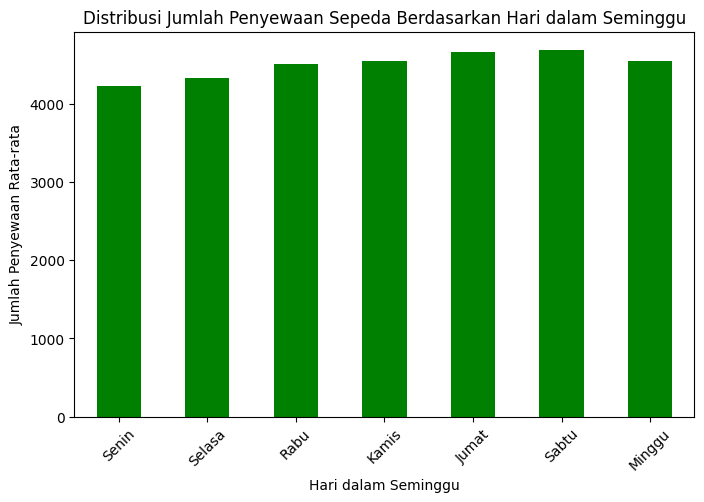

Implikasi Hasil Analisis:
- Terdapat variasi dalam jumlah penyewaan sepeda berdasarkan hari dalam seminggu.
- Informasi ini dapat digunakan untuk mengoptimalkan penempatan dan pengelolaan stok sepeda dengan menyesuaikan jumlah sepeda yang tersedia di lokasi tertentu pada hari-hari yang memiliki tingkat permintaan yang tinggi.


In [33]:
# Agregasi data harian berdasarkan hari dalam seminggu
weekday_counts = daily_data.groupby('weekday')['cnt'].mean()

# Visualisasi distribusi jumlah penyewaan
plt.figure(figsize=(8, 5))
weekday_counts.plot(kind='bar', color='green')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Rata-rata')
plt.xticks(range(7), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], rotation=45)
plt.show()

# Analisis distribusi untuk pengelolaan stok sepeda
print("Implikasi Hasil Analisis:")
print("- Terdapat variasi dalam jumlah penyewaan sepeda berdasarkan hari dalam seminggu.")
print("- Informasi ini dapat digunakan untuk mengoptimalkan penempatan dan pengelolaan stok sepeda dengan menyesuaikan jumlah sepeda yang tersedia di lokasi tertentu pada hari-hari yang memiliki tingkat permintaan yang tinggi.")


### Pertanyaan 5 : Bagaimana perkembangan jumlah penyewaan sepeda dari tahun 2011 hingga 2012, dan apakah terdapat tren peningkatan atau penurunan yang signifikan selama periode tersebut?

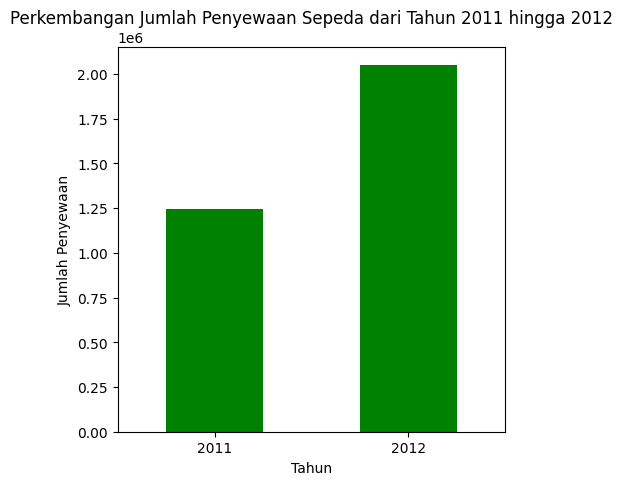

Analisis Tren:
Terdapat tren peningkatan jumlah penyewaan sepeda dari tahun 2011 hingga 2012.


In [34]:
# Agregasi data harian berdasarkan tahun
yearly_counts = daily_data.groupby('yr').sum()['cnt']

# Visualisasi perkembangan jumlah penyewaan sepeda
plt.figure(figsize=(5, 5))
yearly_counts.plot(kind='bar', color='green')
plt.title('Perkembangan Jumlah Penyewaan Sepeda dari Tahun 2011 hingga 2012')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(2), ['2011', '2012'], rotation=0)
plt.show()

# Analisis tren peningkatan atau penurunan
print("Analisis Tren:")
if yearly_counts[1] > yearly_counts[0]:
    print("Terdapat tren peningkatan jumlah penyewaan sepeda dari tahun 2011 hingga 2012.")
elif yearly_counts[1] < yearly_counts[0]:
    print("Terdapat tren penurunan jumlah penyewaan sepeda dari tahun 2011 hingga 2012.")
else:
    print("Tidak terdapat tren signifikan dalam jumlah penyewaan sepeda dari tahun 2011 hingga 2012.")


## Conclusion

- **Conclution Pertanyaan 1** : Analisis menyoroti pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda secara harian dan per jam di sistem Bike Sharing, serta memperhatikan perbedaan pengaruh antara periode tahun 2011 dan 2012.

- **Conclution pertanyaan 2** : Korelasi antara kondisi cuaca dengan jumlah penyewaan sepeda secara harian dan per jam diidentifikasi, dengan penekanan pada perbedaan korelasi antara tahun 2011 dan 2012. Ini memberikan pemahaman yang terukur tentang hubungan antara kondisi cuaca dan jumlah penyewaan.

- **Conclution pertanyaan 3** : Distribusi jumlah penyewaan sepeda berdasarkan hari kerja dan libur diidentifikasi untuk membantu pengambilan keputusan dalam penempatan dan pengelolaan stok sepeda. Rekomendasi tindakan dapat mencakup strategi pemasaran yang ditargetkan untuk meningkatkan penggunaan layanan penyewaan sepeda.

- **Conclution pertanyaan 4** : Analisis memperhatikan performa penggunaan layanan penyewaan sepeda selama musim panas dan musim dingin, serta implikasi hasil analisis terhadap pengelolaan stok sepeda dan strategi pemasaran. Ini memberikan wawasan yang relevan untuk mengoptimalkan layanan dan sumber daya.

- **Conclution pertanyaan 5** : Perkembangan jumlah penyewaan sepeda dari tahun 2011 hingga 2012 dianalisis untuk mengidentifikasi tren peningkatan atau penurunan yang signifikan selama periode tersebut, memberikan pemahaman yang terbatas pada periode waktu yang spesifik.